In [3]:
import os
import sys
import numpy as np
import pandas as pd

np.random.seed(42)  # Set the seed for reproducibility

# Check if the original directory is already saved in a variable
if 'original_directory' not in globals():
    # Save the original working directory the first time
    original_directory = os.getcwd()

# Change back to the original directory whenever the cell is executed
os.chdir(original_directory)

# Go to mother directory
os.chdir("../")

# Verify the current working directory
print("Working directory set to:", os.getcwd())

sys.path.append(os.path.abspath(os.getcwd()))



Working directory set to: c:\Users\Biebert\OneDrive - Universität St.Gallen\Dokumente\OneDrive Dokumente\02_Bildung\01_BVWL Bachelor\01_Kurse\07_Thesis\Code\Portfolio_Optimization_DDPG


In [4]:
tickers = ['AMZN', 'IBM', 'BAX', 'MMM', 'MDT']
from data_scripts import generate_data as gd


model = gd.load_garch_model(filename = "saved_models/garch_and_fit_MMM.pkl")

model

[Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x2c8af649e70,
                      Constant Mean - GARCH Model Results                      
 Dep. Variable:                    MMM   R-squared:                       0.000
 Mean Model:             Constant Mean   Adj. R-squared:                  0.000
 Vol Model:                      GARCH   Log-Likelihood:               -8089.27
 Distribution:                  Normal   AIC:                           16186.5
 Method:            Maximum Likelihood   BIC:                           16212.5
                                         No. Observations:                 4828
 Date:                Thu, Oct 17 2024   Df Residuals:                     4827
 Time:                        12:59:29   Df Model:                            1
                                  Mean Model                                 
                  coef    std err          t      P>|t|      95.0% Con

In [51]:
import pandas as pd
from arch import arch_model

# Function to fit GARCH(1,1) and extract key parameters
def fit_garch(ticker):
        fitted = gd.load_garch_model(filename = f"saved_models/garch_and_fit_{ticker}.pkl")
        return fitted

# Assuming 'data' is your DataFrame with stock prices
tickers = ['MSFT', 'TGT', 'QCOM', 'MU', 'CAT']

for ticker in tickers:
    print(fit_garch(ticker))


[Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x2c8caa19720,                      Constant Mean - GARCH Model Results                      
Dep. Variable:                   MSFT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9574.85
Distribution:                  Normal   AIC:                           19157.7
Method:            Maximum Likelihood   BIC:                           19183.8
                                        No. Observations:                 5030
Date:                Fri, Oct 18 2024   Df Residuals:                     5029
Time:                        12:31:59   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-------

In [43]:
train = pd.read_csv("data/train_data.csv", parse_dates=True, index_col=0)
tickers = ['MSFT', 'TGT', 'QCOM', 'MU', 'CAT']
for ticker in tickers:
    data = train[ticker]

    # Print the kurtosis and skewness of the data with 4 digits of precision

    print(f"{ticker} & {data.kurtosis():.4f} & {data.skew():.4f} \\")



MSFT & 9.8137 & -0.1298 \
TGT & 7.1694 & 0.1354 \
QCOM & 7.1733 & -0.0483 \
MU & 4.1886 & -0.1433 \
CAT & 4.4438 & -0.1015 \


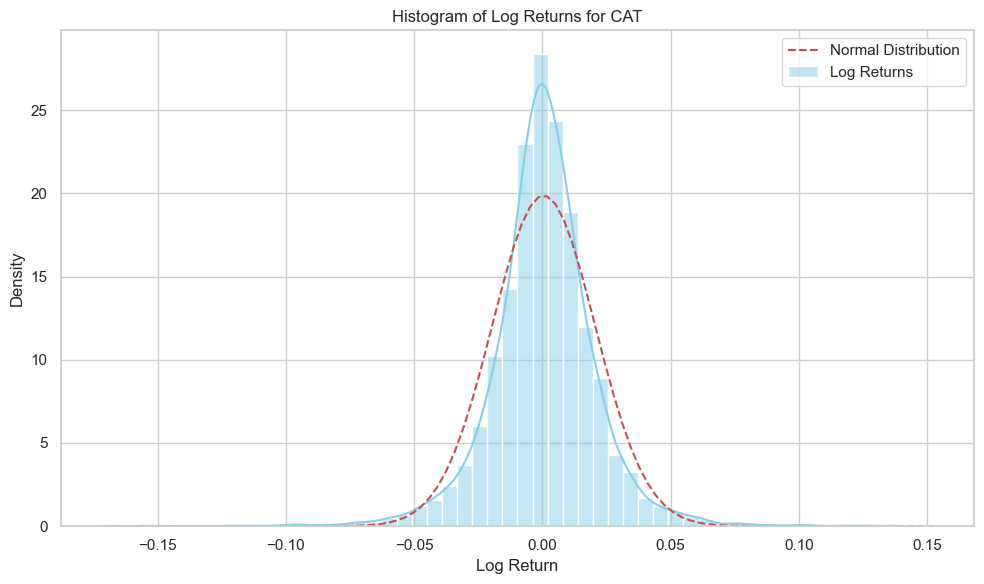

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Create a histogram
def plot_histogram(data, ticker, plot_dir):
    # Plot histogram with normal distribution overlay
    plt.figure(figsize=(10,6))
    sns.histplot(data, kde=True, stat="density", bins=50, color='skyblue', label='Log Returns')
    
    # Overlay normal distribution
    mu = data.mean()
    sigma = data.std()
    xmin, xmax = plt.xlim()
    x = pd.Series(np.linspace(xmin, xmax, 100))
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r--', label='Normal Distribution')
    
    plt.title(f'Histogram of Log Returns for {ticker}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    # plt.savefig(os.path.join(plot_dir, f'histogram_{ticker}.png'))
    plt.show()


# Load the train data
train = pd.read_csv("data/train_data.csv", parse_dates=True, index_col=0)
BAX = train['CAT']
tickers = ['CAT', 'TGT', 'QCOM', 'MU', 'CAT']

# Plot histogram
plot_histogram(BAX, 'CAT', plot_dir)